<a href="https://colab.research.google.com/github/srinijasriram/2216166_AIML_BootCamp_2023/blob/main/SUV_MARUTI_ALL_CLASSIFIERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
#1.reading the dataset
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")


In [29]:
#printing first five
print(df.head(6))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0


In [30]:
#printing all
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [31]:
#printing specific column  for example age with row 395
print(df['Age'][395])

46


In [32]:
#to find the shape
print(df.shape)

(400, 5)


In [33]:
#to get the information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


<function matplotlib.pyplot.show(close=None, block=None)>

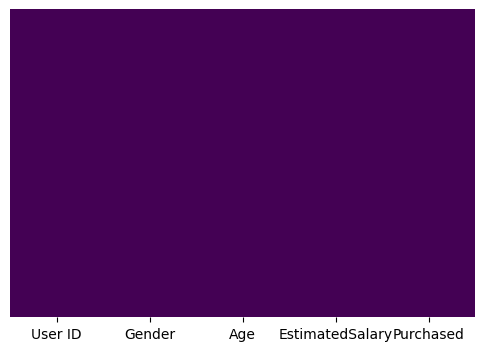

In [34]:
#graphical representation for to check the null values in the dataset
#2.preprocessing
import seaborn as se
import matplotlib.pyplot as plt

def null_values(df):
  plt.figure(figsize=(6,4))
  se.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
  return plt.show

null_values(df)

In [35]:
#There is no null values in the dataset, converting non numeric form into numeric form
#label encoder
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df.Gender=le.fit_transform(df.Gender) #converting string into numeric values
df.head() 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


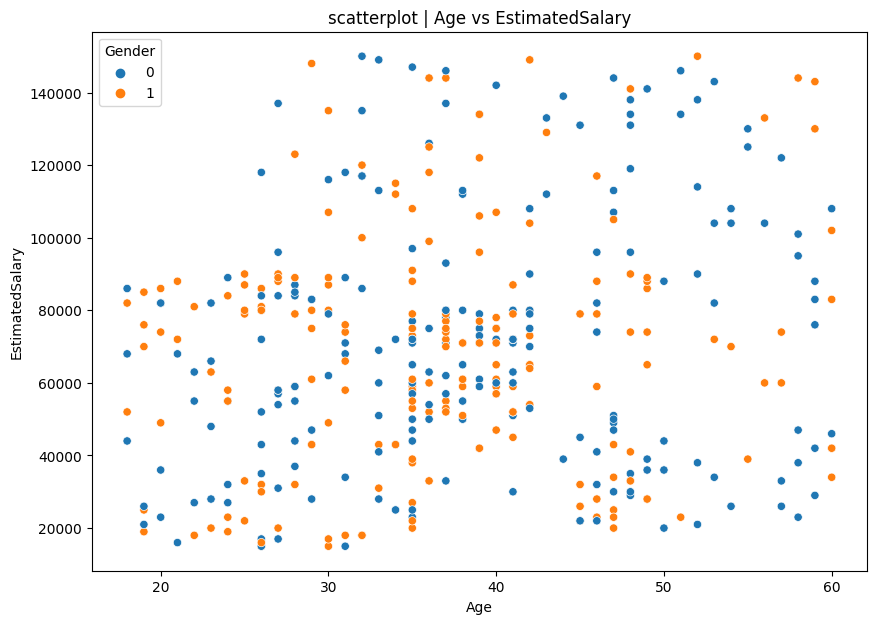

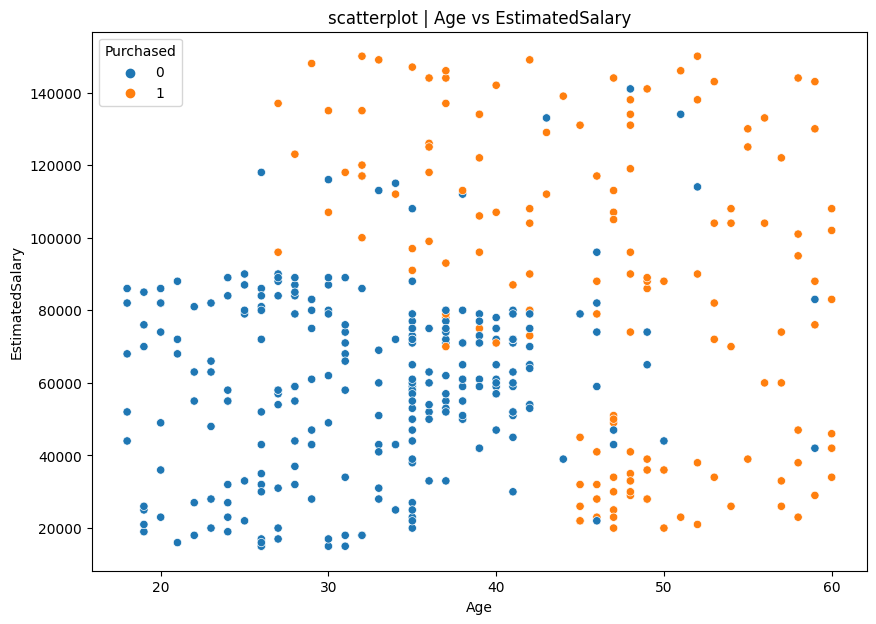

In [36]:
#3.visualization
import matplotlib.pyplot as plt
import seaborn as se
def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  se.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"scatterplot | {col1} vs {col2}")

plot_vs(df,'Age','EstimatedSalary','Gender')
plot_vs(df,'Age','EstimatedSalary','Purchased')

In [37]:
#4.Feature Engineering
#df.drop(['A'],axis=1) i.e axis=1 for column and axis=0 for row
df=df.drop(['User ID',	'Gender'],axis=1)

In [38]:
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [39]:
#5.loading the data
X=df.iloc[:,:-1].values #iloc index location in 2d array
Y=df.iloc[:,-1:].values
print(X)
print(Y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [40]:
#6.splitting the dataset
#train and test  data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [41]:
x_train

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000],
       [    42,  80000],
       [    40,  75000],
       [    59, 130000],
       [    46,  41000],
       [    41,  60000],
       [    42,  64000],
       [    37, 146000],
       [    23,  48000],
       [    25,  33000],
       [    24,  84000],
       [    27,  96000],
       [    23,  63000],
       [    48,  33000],
       [    48,  90000],
       [    42, 104000],
       [    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],


In [42]:
x_test

array([[    30,  87000],
       [    38,  50000],
       [    35,  75000],
       [    30,  79000],
       [    35,  50000],
       [    27,  20000],
       [    31,  15000],
       [    36, 144000],
       [    18,  68000],
       [    47,  43000],
       [    30,  49000],
       [    28,  55000],
       [    37,  55000],
       [    39,  77000],
       [    20,  86000],
       [    32, 117000],
       [    37,  77000],
       [    19,  85000],
       [    55, 130000],
       [    35,  22000],
       [    35,  47000],
       [    47, 144000],
       [    41,  51000],
       [    47, 105000],
       [    23,  28000],
       [    49, 141000],
       [    28,  87000],
       [    29,  80000],
       [    37,  62000],
       [    32,  86000],
       [    21,  88000],
       [    37,  79000],
       [    57,  60000],
       [    37,  53000],
       [    24,  58000],
       [    18,  52000],
       [    22,  81000],
       [    34,  43000],
       [    31,  34000],
       [    49,  36000],


In [43]:
y_train

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [44]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [47]:
#normalization
#converting the dataset into another form such that all the data will be in same range
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
x_train=sst.fit_transform(x_train)
x_test=sst.transform(x_test)

In [48]:
x_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [49]:
x_test

array([[-7.98950822e-01,  4.94607583e-01],
       [-2.12648508e-02, -5.77359062e-01],
       [-3.12897090e-01,  1.46942725e-01],
       [-7.98950822e-01,  2.62831011e-01],
       [-3.12897090e-01, -5.77359062e-01],
       [-1.09058306e+00, -1.44652121e+00],
       [-7.01740076e-01, -1.59138156e+00],
       [-2.15686344e-01,  2.14601566e+00],
       [-1.96547978e+00, -5.58617754e-02],
       [ 8.53631867e-01, -7.80163563e-01],
       [-7.98950822e-01, -6.06331134e-01],
       [-9.93372315e-01, -4.32498705e-01],
       [-1.18475597e-01, -4.32498705e-01],
       [ 7.59458956e-02,  2.04886868e-01],
       [-1.77105829e+00,  4.65635512e-01],
       [-6.04529329e-01,  1.36376973e+00],
       [-1.18475597e-01,  2.04886868e-01],
       [-1.86826903e+00,  4.36663440e-01],
       [ 1.63131784e+00,  1.74040666e+00],
       [-3.12897090e-01, -1.38857706e+00],
       [-3.12897090e-01, -6.64275277e-01],
       [ 8.53631867e-01,  2.14601566e+00],
       [ 2.70367388e-01, -5.48386991e-01],
       [ 8.

In [50]:
#7.Building model


**------LOGISTIC REGRESSION------**

In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [53]:
#8.training the dataset
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [56]:
#9.testing the dataset
y_pred=model.predict(x_test)


In [57]:
print('predicted value for training data',model.score(x_train,y_train))
print('predicted value for testing data',model.score(x_test,y_test))
print('predicted value for ovarall data',model.score(sst.transform(X),Y))

predicted value for training data 0.821875
predicted value for testing data 0.925
predicted value for ovarall data 0.8425


**---------------KNN----------------**

In [58]:
from sklearn.neighbors import KNeighborsClassifier
k_clf=KNeighborsClassifier(n_neighbors=20)

In [59]:
#8.training the dataset
k_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [60]:
#9.testing the model
y_pred=k_clf.predict(x_test)

In [61]:
print('predicted value for training data',k_clf.score(x_train,y_train))
print('predicted value for testing data',k_clf.score(x_test,y_test))
print('predicted value for ovarall data',k_clf.score(sst.transform(X),Y))

predicted value for training data 0.903125
predicted value for testing data 0.95
predicted value for ovarall data 0.9125


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

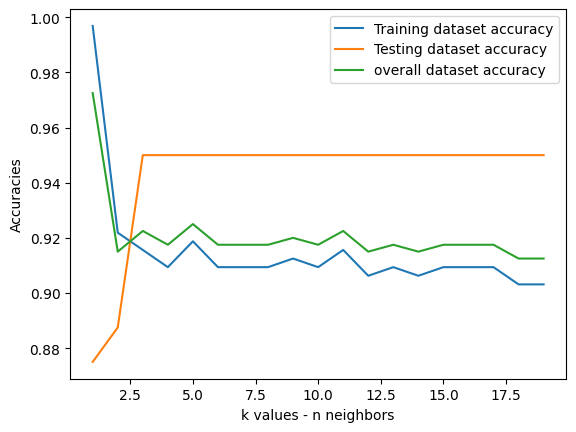

In [62]:
#cross validation to find the best k value
import numpy as np
neighbors = np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
overall_accuracy=np.empty(len(neighbors))
#Loop over K values
for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)

  #Compute the training and testing accuracy of ML model
  train_accuracy[i]=knn.score(x_train,y_train)
  test_accuracy[i]=knn.score(x_test,y_test)

  #overall score
  overall_accuracy[i]=knn.score(sst.transform(X),Y)

import matplotlib.pyplot as plt
plt.plot(neighbors,train_accuracy,label='Training dataset accuracy')
plt.plot(neighbors,test_accuracy,label='Testing dataset accuracy')
plt.plot(neighbors,overall_accuracy,label='overall dataset accuracy')
plt.legend()
plt.xlabel('k values - n neighbors')
plt.ylabel("Accuracies")
plt.show()

**----------NAIVE BAYES------------**

In [71]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [72]:
#8.training the dataset
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [73]:
#9.testing the model
y_pred=model.predict(x_test)

In [74]:
print('predicted value for training data',model.score(x_train,y_train))
print('predicted value for testing data',model.score(x_test,y_test))
print('predicted value for ovarall data',model.score(sst.transform(X),Y))

predicted value for training data 0.884375
predicted value for testing data 0.9125
predicted value for ovarall data 0.89


**--------------DECISION TREE-----------**

In [75]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [76]:
#8.training the dataset
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
#9.testing the model
y_pred=model.predict(x_test)

In [78]:
print('predicted value for training data',model.score(x_train,y_train))
print('predicted value for testing data',model.score(x_test,y_test))
print('predicted value for ovarall data',model.score(sst.transform(X),Y))

predicted value for training data 0.996875
predicted value for testing data 0.9125
predicted value for ovarall data 0.98


**-----------RANDOM FOREST-------------**

In [79]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [80]:
#8.training the dataset
model.fit(x_train,y_train)

<ipython-input-80-8a031d6a00f3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier()

In [81]:
#9.testing the model
y_pred=model.predict(x_test)

In [82]:
print('predicted value for training data',model.score(x_train,y_train))
print('predicted value for testing data',model.score(x_test,y_test))
print('predicted value for ovarall data',model.score(sst.transform(X),Y))

predicted value for training data 0.996875
predicted value for testing data 0.925
predicted value for ovarall data 0.9825


In [89]:
#10.estimation
age=int(input("enter the age"))
sal=int(input("enter the salary"))
inputs=sst.transform([[age,sal]])
print(model.predict(inputs))

enter the age46
enter the salary41000
[1]
